### importação de bibliotecas

In [45]:
import pandas as pd
import numpy as np
import glob 
import matplotlib.pyplot as plt
import urllib
import zipfile
import os

### Obtenção dos dados

In [43]:
# Download dos arquivos
urllib.request.urlretrieve('https://www02.smt.ufrj.br/~offshore/mfs/database/mafaulda/imbalance.zip', 'imbalance.zip')
urllib.request.urlretrieve('https://www02.smt.ufrj.br/~offshore/mfs/database/mafaulda/normal.zip', 'normal.zip')

# extração dos arquivos
with zipfile.ZipFile('imbalance.zip', 'r') as zip_ref:
    zip_ref.extractall('data')
with zipfile.ZipFile('normal.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

# excluir arquivos .zip
os.remove('normal.zip')
os.remove('imbalance.zip')

('normal.zip', <http.client.HTTPMessage at 0x276b567a690>)

### Verificação de dados inválidos

In [2]:
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header=None)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n

In [3]:
def checkNullValues(path_names):
    for file in path_names:
        data = pd.read_csv(file, header=None)
        nullValues = data.isnull().sum()
        if any(nullValues > 0):
            print('CSV file {} has null values'.format(file))

In [4]:
normal_file_names = glob.glob('./data/normal/*.csv')
imbalance6g_file_names = glob.glob('./data/imbalance/6g/*.csv')
imbalance10g_file_names = glob.glob('./data/imbalance/10g/*.csv')
imbalance15g_file_names = glob.glob('./data/imbalance/15g/*.csv')
imbalance20g_file_names = glob.glob('./data/imbalance/20g/*.csv')
imbalance25g_file_names = glob.glob('./data/imbalance/25g/*.csv')
imbalance30g_file_names = glob.glob('./data/imbalance/30g/*.csv')
imbalance35g_file_names = glob.glob('./data/imbalance/35g/*.csv')

checkNullValues(normal_file_names)
checkNullValues(imbalance6g_file_names)
checkNullValues(imbalance10g_file_names)
checkNullValues(imbalance15g_file_names)
checkNullValues(imbalance20g_file_names)
checkNullValues(imbalance25g_file_names)
checkNullValues(imbalance30g_file_names)
checkNullValues(imbalance35g_file_names)

In [5]:
data_normal= dataReader( glob.glob('./data/normal/*.csv'))
data_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250000 entries, 0 to 12249999
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
dtypes: float64(8)
memory usage: 747.7 MB


Text(0.02, 0.5, 'Voltage')

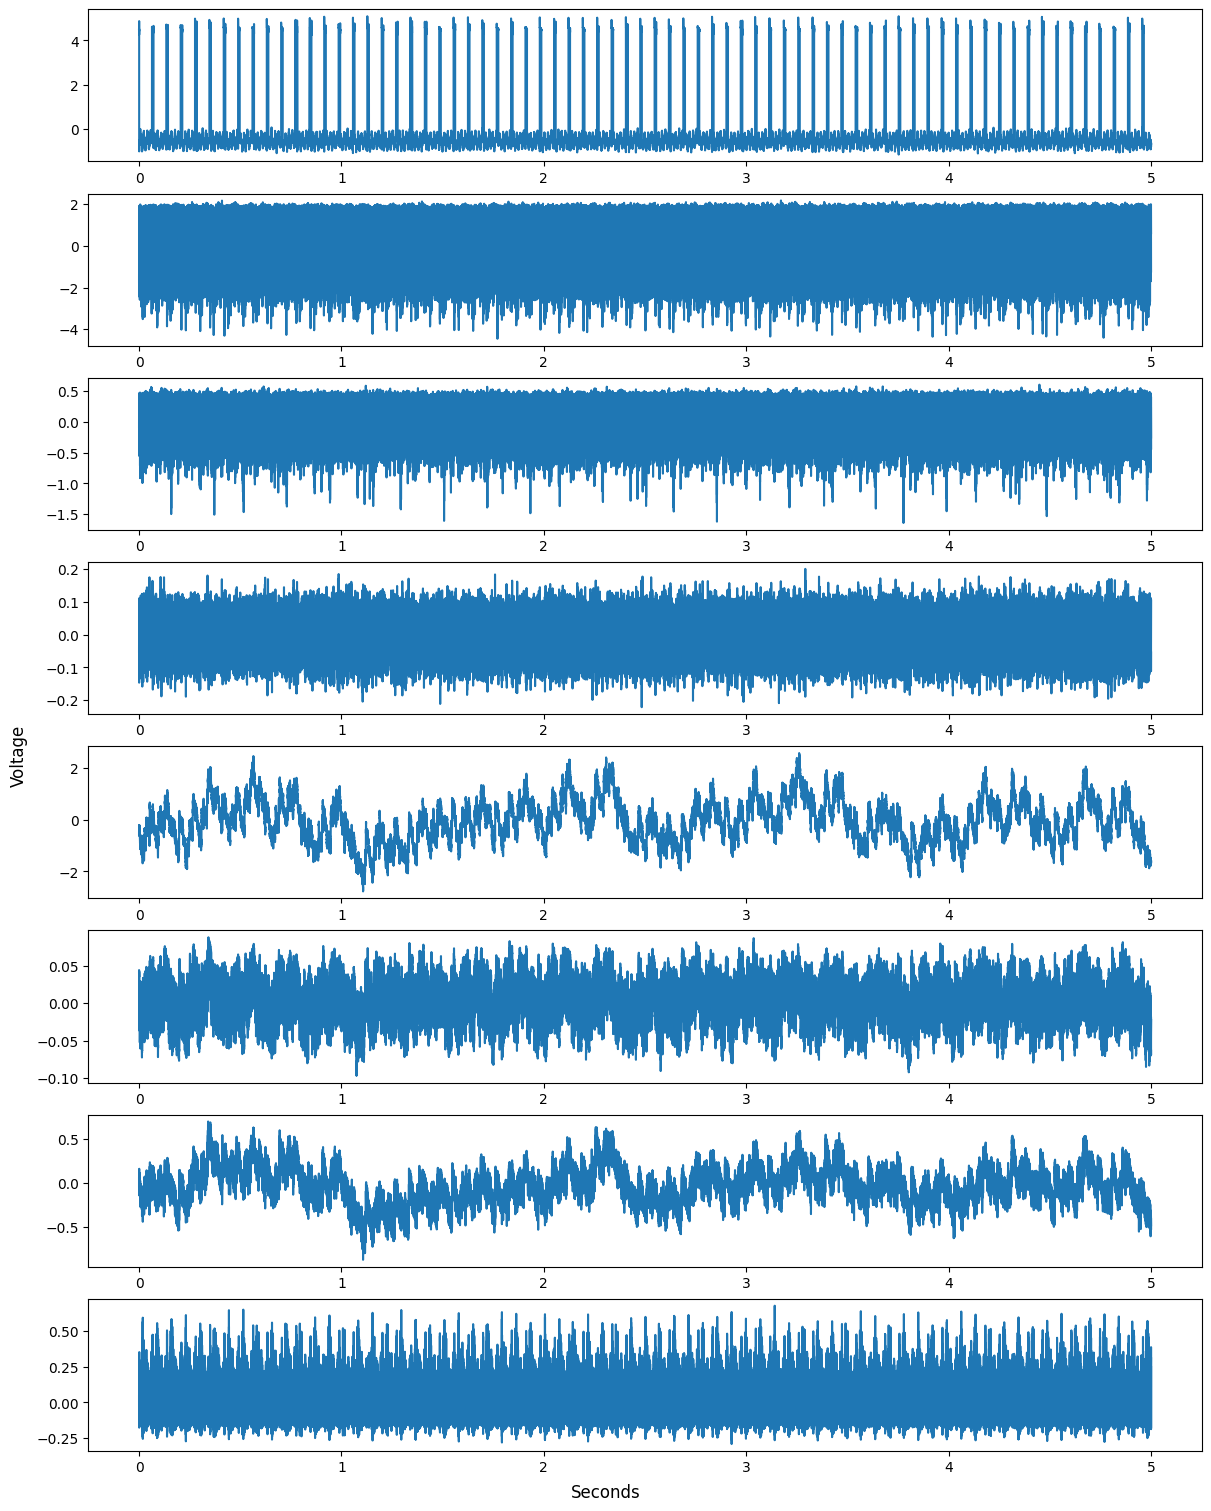

In [31]:
normalSample = pd.read_csv('./data/normal/14.336.csv', header=None)
timeAxes = np.arange(0 ,5, 1/50000)
figure, axis = plt.subplots(8,1, figsize=(12,15),  constrained_layout=True)
axis[0].plot(timeAxes, normalSample[0])
axis[1].plot(timeAxes, normalSample[1])
axis[2].plot(timeAxes, normalSample[2])
axis[3].plot(timeAxes, normalSample[3])
axis[4].plot(timeAxes, normalSample[4])
axis[5].plot(timeAxes, normalSample[5])
axis[6].plot(timeAxes, normalSample[6])
axis[7].plot(timeAxes, normalSample[7])
figure.supxlabel('Seconds')
figure.supylabel('Voltage')

Text(0.02, 0.5, 'Voltage')

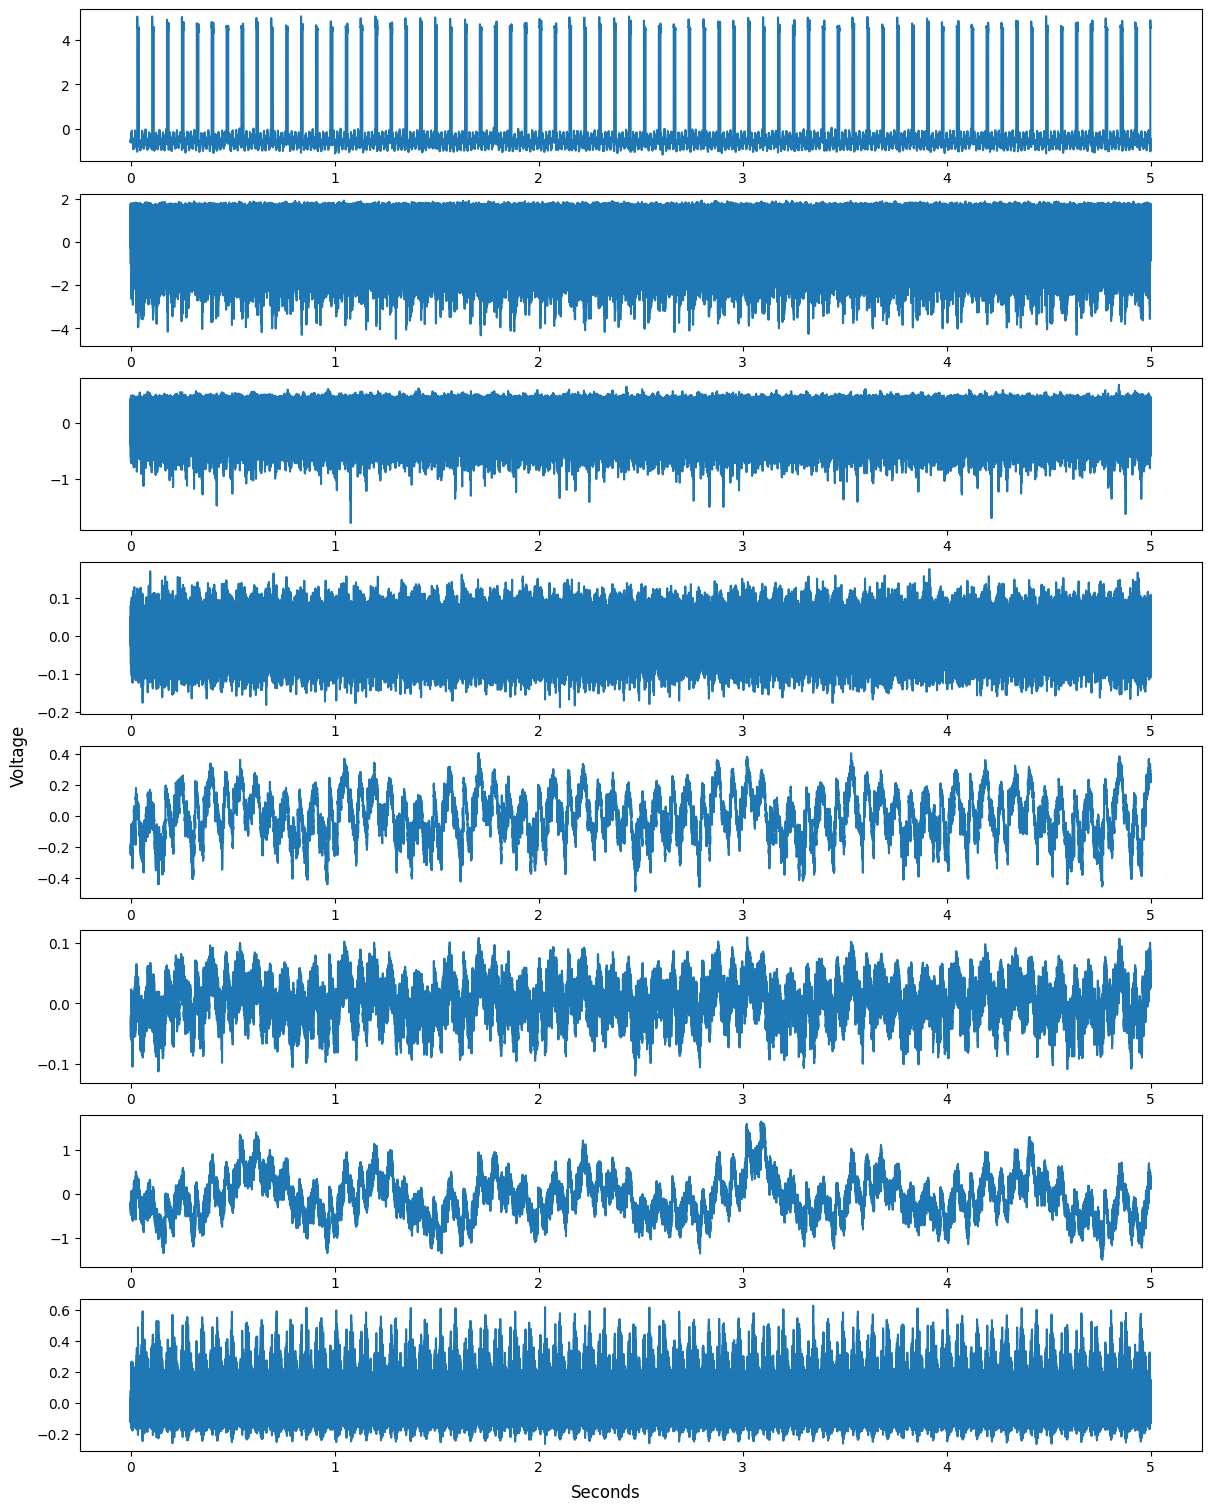

In [51]:
imbalance6gSample = pd.read_csv('./data/imbalance/6g/13.9264.csv', header=None)
timeAxes = np.arange(0 ,5, 1/50000)
figure, axis = plt.subplots(8,1, figsize=(12,15),  constrained_layout=True)
axis[0].plot(timeAxes, imbalance6gSample[0])
axis[1].plot(timeAxes, imbalance6gSample[1])
axis[2].plot(timeAxes, imbalance6gSample[2])
axis[3].plot(timeAxes, imbalance6gSample[3])
axis[4].plot(timeAxes, imbalance6gSample[4])
axis[5].plot(timeAxes, imbalance6gSample[5])
axis[6].plot(timeAxes, imbalance6gSample[6])
axis[7].plot(timeAxes, imbalance6gSample[7])
figure.supxlabel('Seconds')
figure.supylabel('Voltage')

Deste gráfico chegamos a 2 conclusões:
- Dados não estão na mesma escala, o que pode enviesar o algoritmo de machine learn.
- Alta taxa de amostragem (50kHz), o que tornará o processo de treinamento muito lento.

In [84]:
def resample(data):
    sample_rate_target = 500 # Hz
    data_resampled = pd.DataFrame()
    period = 5 # seconds
    step = int(len(data)/period / sample_rate_target )
    start_index = 0
    stop_index = step
    for i in range(0, len(data), step):
        # data_resampled.append(data[start_index:stop_index].mean(), ignore_index=True)
        pd.concat([data_resampled, data[start_index:stop_index].mean()], ignore_index=True)
        start_index += step
        stop_index += step
   
    return data_resampled

In [85]:
r2 = resample(normalSample)

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_13452\3282667428.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_resampled.append(data[start_index:stop_index].mean(), ignore_index=True)
C:\Users\Ricardo\AppData\Local\Temp\ipykernel_13452\3282667428.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_resampled.append(data[start_index:stop_index].mean(), ignore_index=True)
C:\Users\Ricardo\AppData\Local\Temp\ipykernel_13452\3282667428.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_resampled.append(data[start_index:stop_index].mean(), ignore_index=True)
C:\Users\Ricardo\AppData\Local\Temp\ipykernel_13452\3282667428.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

KeyError: 0

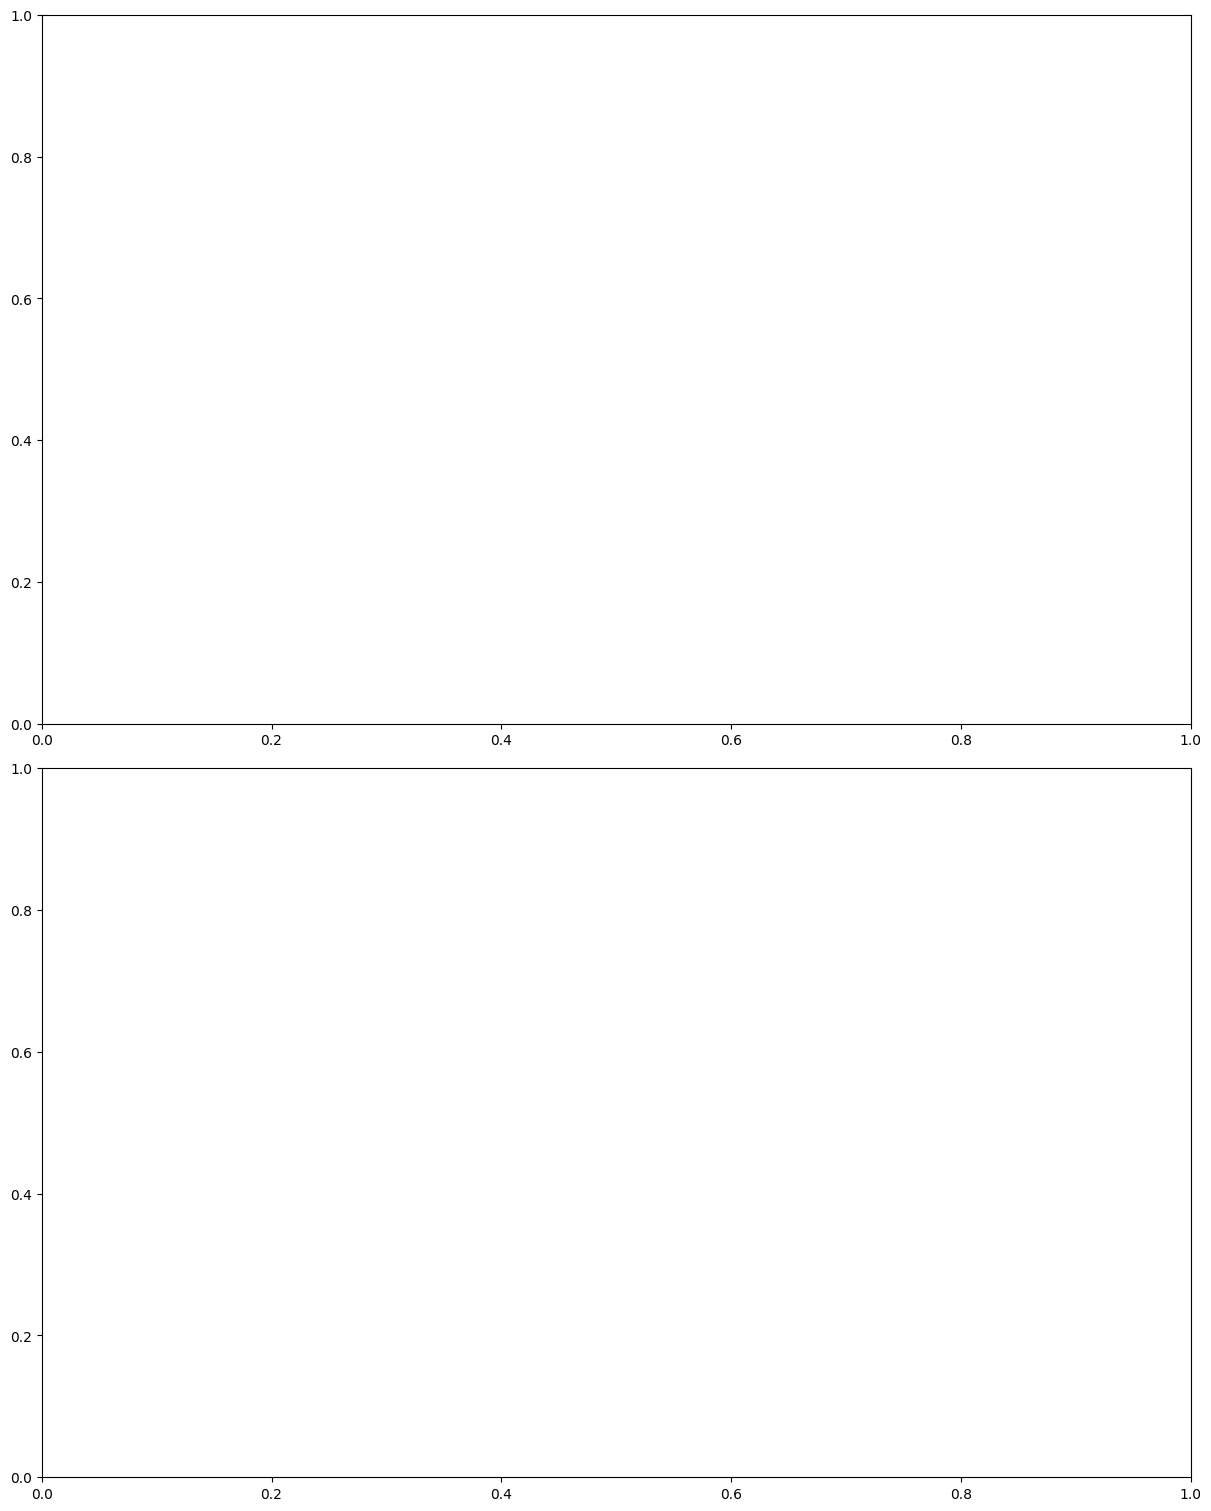

In [80]:

normalSampleResempled = resample(normalSample)

timeAxes = np.arange(0 ,5, 1/50000)
figure, axis = plt.subplots(2,1, figsize=(12,15),  constrained_layout=True)
# axis[0].plot(timeAxes, normalSample[0])
axis[1].plot(timeAxes, normalSampleResempled[0])